In [1]:
# 1.Summary Statistics for Numerical Columns

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


summary = df.describe().T  
summary['median'] = df.median()
summary['mode'] = df.mode().iloc[0]
print(summary[['mean', 'median', 'mode', 'std']])

                       mean  median  mode       std
sepal length (cm)  5.843333    5.80   5.0  0.828066
sepal width (cm)   3.057333    3.00   3.0  0.435866
petal length (cm)  3.758000    4.35   1.4  1.765298
petal width (cm)   1.199333    1.30   0.2  0.762238


In [4]:
# 2. Histogram and Box Plot (With Outlier Identification

Text(0.5, 1.0, 'Histogram of sepal length (cm)')

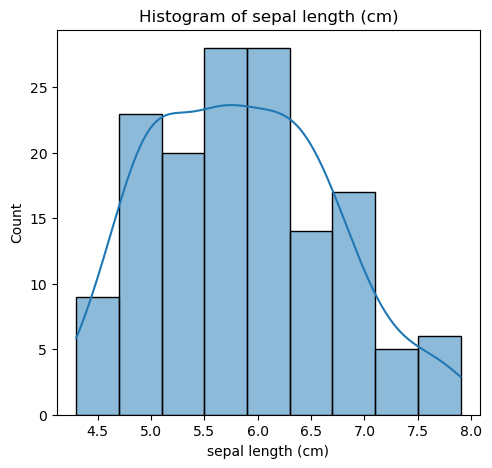

In [5]:
col = 'sepal length (cm)'

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[col], kde=True)
plt.title(f'Histogram of {col}')

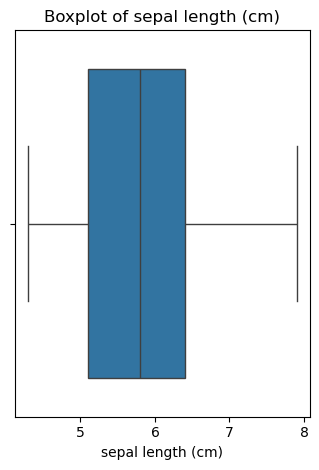

In [6]:
plt.subplot(1, 2, 2)
sns.boxplot(x=df[col])
plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [7]:
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
print("Outliers in", col, ":\n", outliers)

Outliers in sepal length (cm) :
 Empty DataFrame
Columns: [sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)]
Index: []


In [8]:
# 3.Correlation Matrix with Heatmap

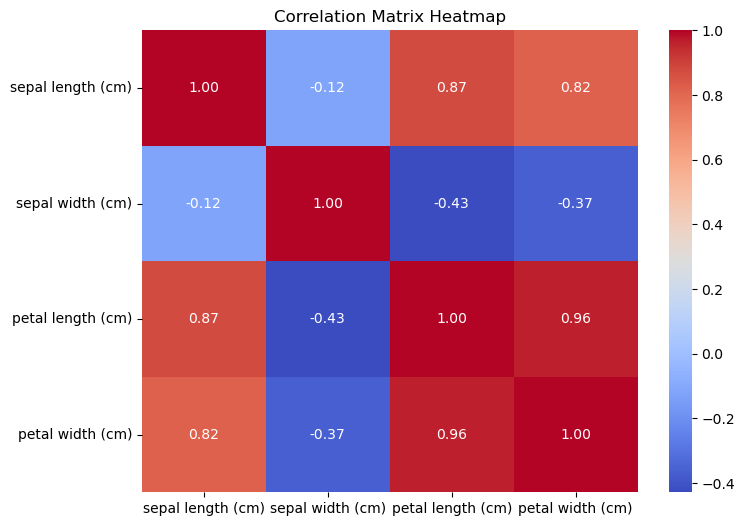

In [9]:
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [10]:
# 4.Scatter Plot Matrix

C:\Users\PCS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


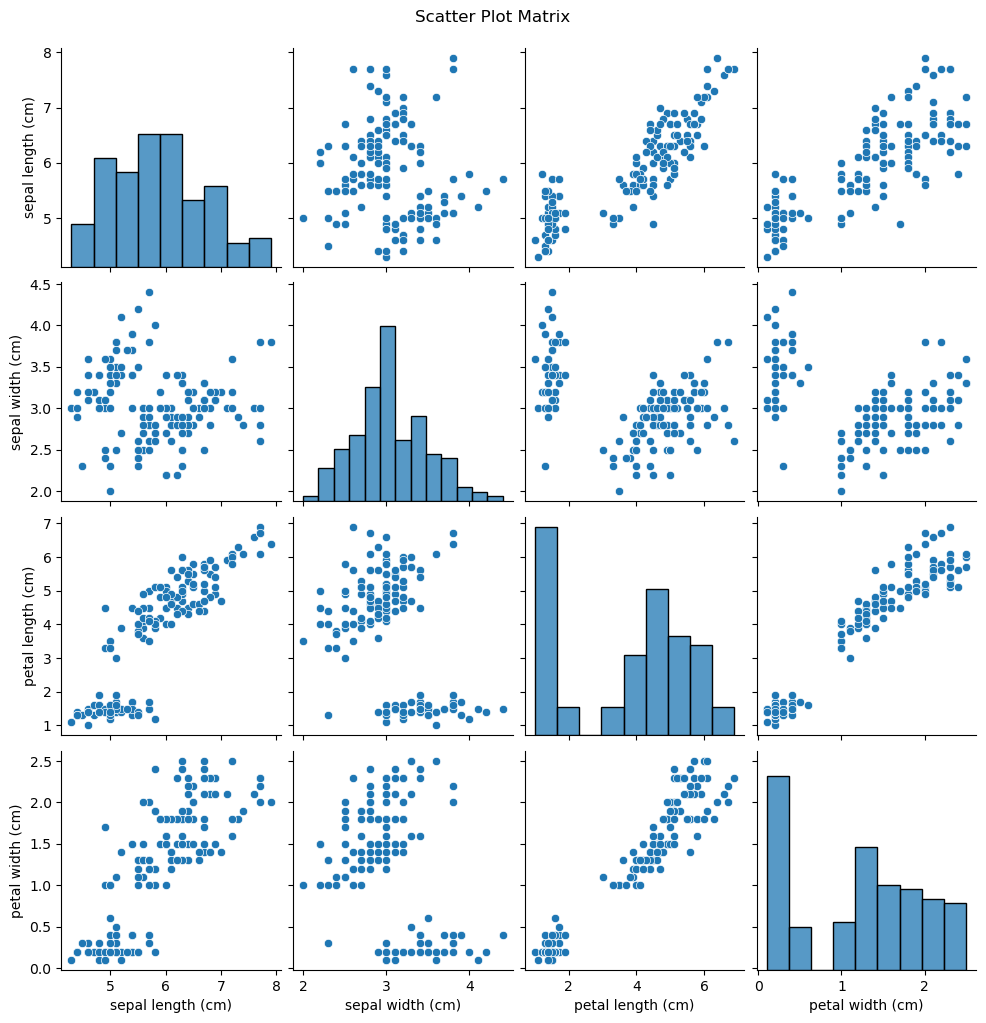

In [11]:
sns.pairplot(df)
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

In [12]:
# 5. Feature Engineering + Importance Visualization

In [13]:
df['petal area'] = df['petal length (cm)'] * df['petal width (cm)']

df['target'] = iris.target

X = df.drop('target', axis=1)
y = df['target']
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

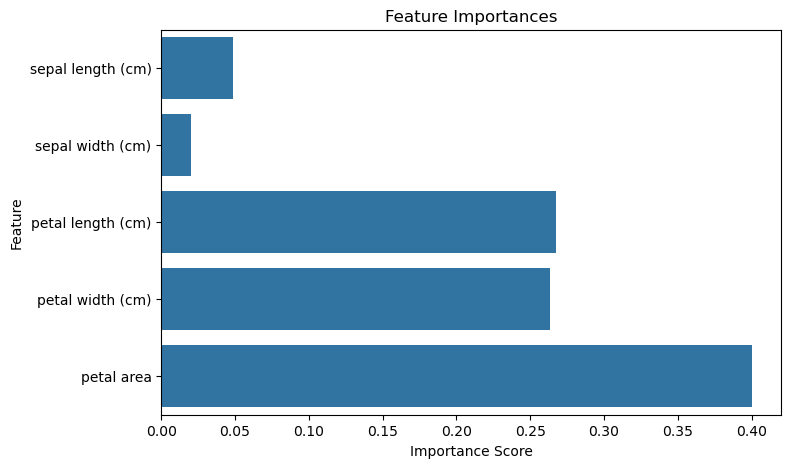

In [14]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()